In [1]:
pip install tensorflowjs

In [2]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
# from google.colab import drive

In [3]:
#Mount Google drive
# drive.mount('/content/drive')

In [4]:
# data_dir='/content/drive/MyDrive/Butterfly Dataset/Life Stages/train'
# print(data_dir)
data_dir='C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages'
print(data_dir)

C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages


In [5]:
data_dir=tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 2332 files belonging to 4 classes.


In [6]:
count = 0
dirs = os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/')
for dir in dirs:
    files = list(os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/'+dir))
    print( dir +' Folder has '+ str(len(files)) + '/C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + '/C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/')

Butterfly Folder has 829/C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/
Eggs Folder has 95/C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/
Larvae Folder has 441/C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/
Pupae Folder has 967/C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/
Images Folder has 2332/C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/


In [9]:
base_dir = 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages'
img_size = 180
batch = 32

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 2332 files belonging to 4 classes.
Using 1866 files for training.
Found 2332 files belonging to 4 classes.
Using 466 files for validation.


In [11]:
butterfly_stages = train_ds.class_names
butterfly_stages

['Butterfly', 'Eggs', 'Larvae', 'Pupae']

In [12]:
import matplotlib.pyplot as plt

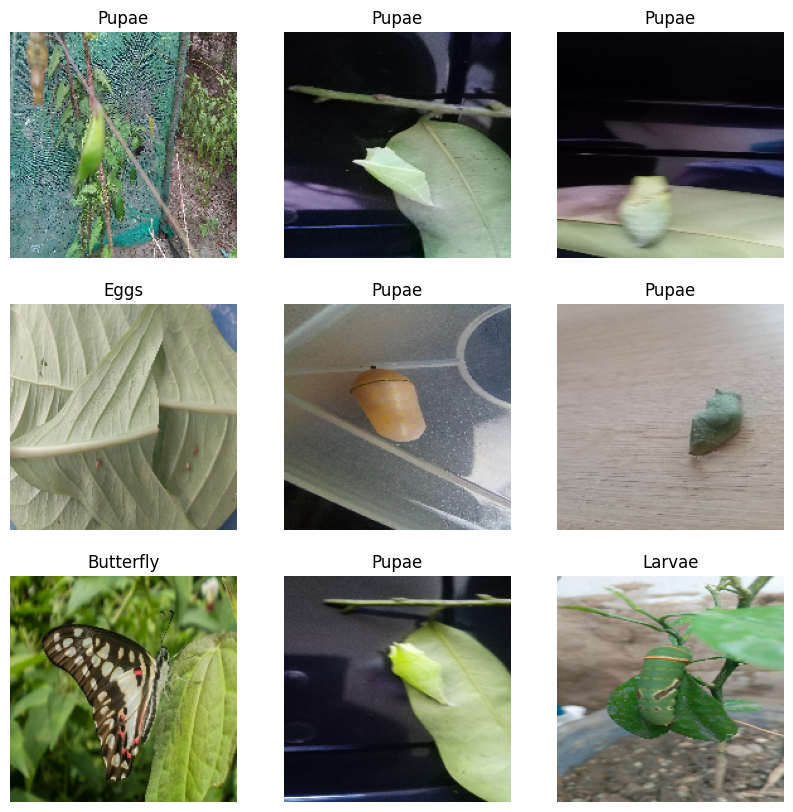

In [13]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(butterfly_stages[labels[i]])
        plt.axis('off')

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [16]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

##Data Augmentation

In [17]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

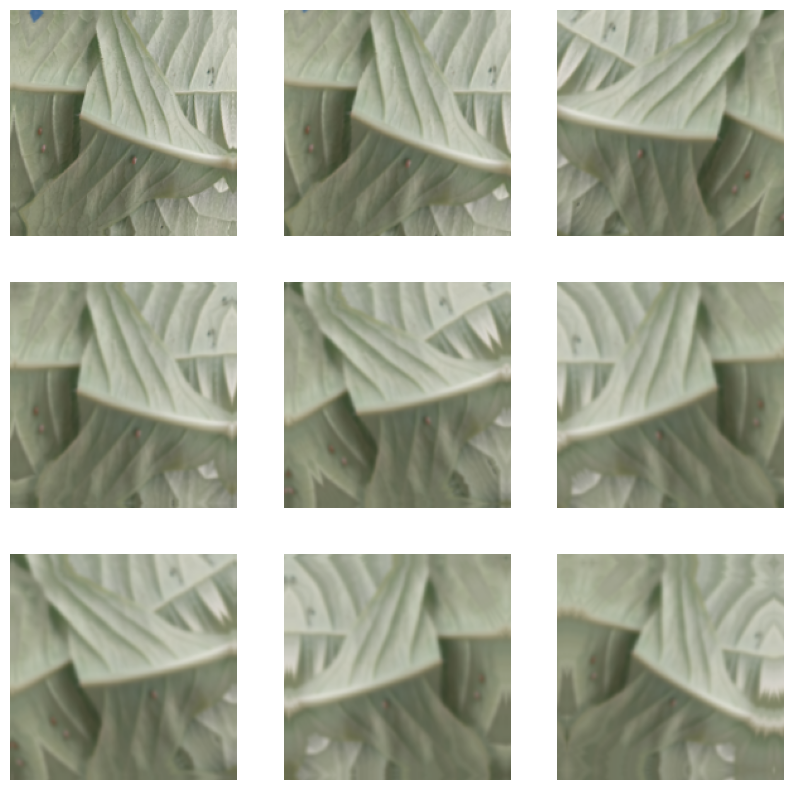

In [18]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

##Model Creation

In [19]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [22]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15


59/59 [==============================] - 24s 322ms/step - loss: 0.7918 - accuracy: 0.6951 - val_loss: 0.5707 - val_accuracy: 0.8133
Epoch 2/15
59/59 [==============================] - 10s 177ms/step - loss: 0.3709 - accuracy: 0.8853 - val_loss: 0.3504 - val_accuracy: 0.9292
Epoch 3/15
59/59 [==============================] - 10s 176ms/step - loss: 0.2857 - accuracy: 0.9153 - val_loss: 0.4261 - val_accuracy: 0.8970
Epoch 4/15
59/59 [==============================] - 29s 501ms/step - loss: 0.2541 - accuracy: 0.9202 - val_loss: 0.4232 - val_accuracy: 0.8820
Epoch 5/15
59/59 [==============================] - 30s 515ms/step - loss: 0.2055 - accuracy: 0.9309 - val_loss: 0.3899 - val_accuracy: 0.9163
Epoch 6/15
59/59 [==============================] - 56s 955ms/step - loss: 0.1988 - accuracy: 0.9282 - val_loss: 0.3593 - val_accuracy: 0.9142
Epoch 7/15
59/59 [==============================] - 11s 189ms/step - loss: 0.1640 - accuracy: 0.9486 - val_loss: 0.3192 - val_accuracy: 0.92

In [25]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + butterfly_stages[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

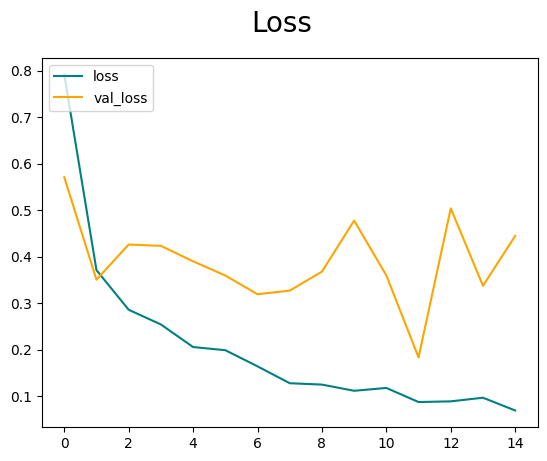

In [26]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

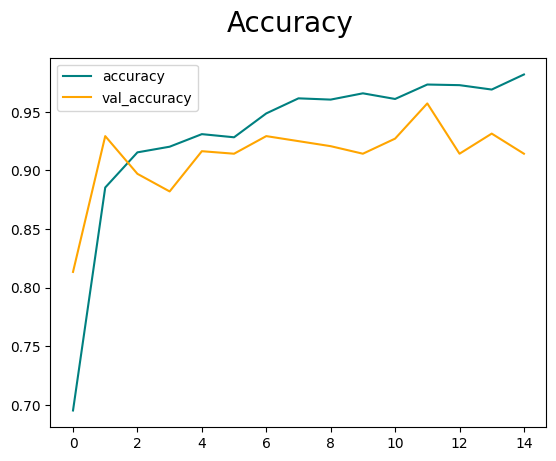

In [27]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [34]:
classify_images('C:/Users/jerwin/Documents/GitHub/butterfly_photos/stages/Larvae/agamemnon_larvae (73).jpg')

1/1 [==============================] - 0s 314ms/step


'The Image belongs to Larvae with a score of 90.2485191822052'

In [35]:
model.save('C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/model_Life_Stages.keras')

In [36]:
model.save('C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/model_Life_Stages.h5')